# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    params = {
        "q": city,
        "appid": weather_api_key,
        "units": "metric"
    }
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try: 
        run_request = requests.get(url, params=params)
        # Parse the JSON and retrieve data
        city_weather = run_request.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sisimiut
Processing Record 2 of Set 1 | pakpattan
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | isafjordur
Processing Record 5 of Set 1 | nova sintra
Processing Record 6 of Set 1 | port mathurin
Processing Record 7 of Set 1 | alofi
Processing Record 8 of Set 1 | massaguet
Processing Record 9 of Set 1 | hovd
Processing Record 10 of Set 1 | kataragama
City not found. Skipping...
Processing Record 11 of Set 1 | san antonio de pale
Processing Record 12 of Set 1 | ribeira brava
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | mandiana
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | tralee
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | arauco
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | ribeira grande
Processing Recor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [5]:
# Display sample data
city_data_df.head()
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sisimiut,66.9395,-53.6735,-6.39,78,100,2.61,GL,1712801914
1,pakpattan,30.3410,73.3866,25.81,18,18,3.28,PK,1712801914
2,puerto natales,-51.7236,-72.4875,2.70,90,8,2.34,CL,1712801838
3,isafjordur,66.0755,-23.1240,-3.74,88,92,1.86,IS,1712801914
4,nova sintra,14.8667,-24.7167,22.57,77,11,9.83,CV,1712801914
...,...,...,...,...,...,...,...,...,...
559,dakhla,23.6848,-15.9580,18.19,92,0,4.91,EH,1712801979
560,karratha,-20.7377,116.8463,29.07,51,7,6.42,AU,1712801979
561,srivilliputhur,9.5167,77.6333,27.70,69,90,2.10,IN,1712801979
562,mar del plata,-38.0023,-57.5575,14.49,69,75,7.60,AR,1712801861


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sisimiut,66.9395,-53.6735,-6.39,78,100,2.61,GL,1712801914
1,pakpattan,30.3410,73.3866,25.81,18,18,3.28,PK,1712801914
2,puerto natales,-51.7236,-72.4875,2.70,90,8,2.34,CL,1712801838
3,isafjordur,66.0755,-23.1240,-3.74,88,92,1.86,IS,1712801914
4,nova sintra,14.8667,-24.7167,22.57,77,11,9.83,CV,1712801914


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

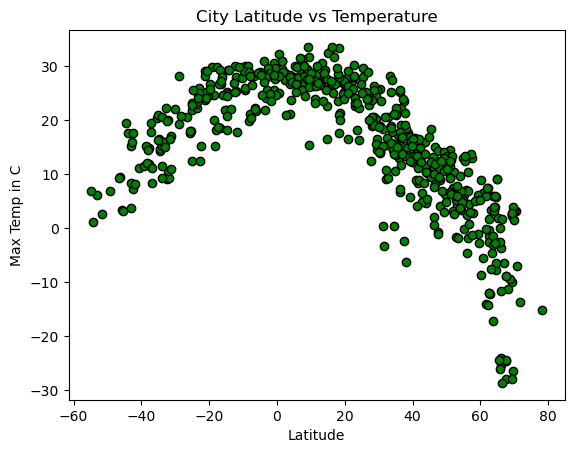

In [8]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df['Lat']
temp = city_data_df['Max Temp']
plt.scatter(lat, temp, edgecolors='black', color= 'green')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temp in C')
plt.title('City Latitude vs Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

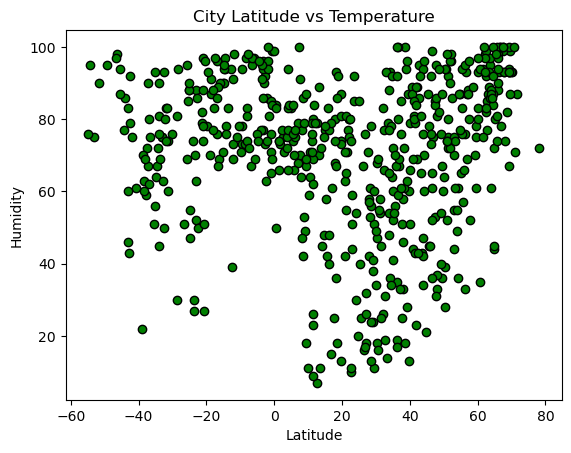

In [9]:
# Build the scatter plots for latitude vs. humidity
lat = city_data_df['Lat']
humid = city_data_df['Humidity']
plt.scatter(lat, humid, edgecolors='black', color= 'green')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs Temperature')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

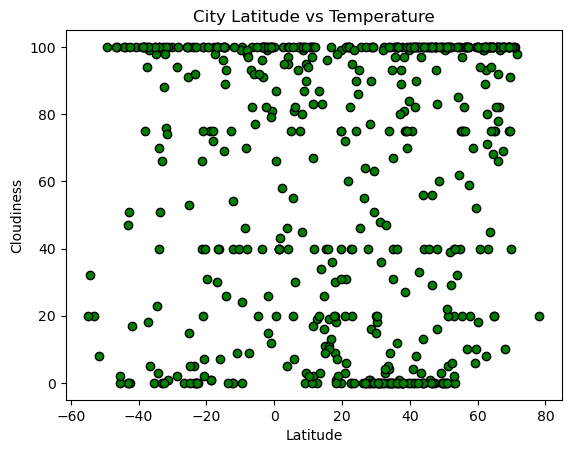

In [10]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_data_df['Lat']
cloudi = city_data_df['Cloudiness']
plt.scatter(lat, cloudi, edgecolors='black', color= 'green')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs Temperature')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

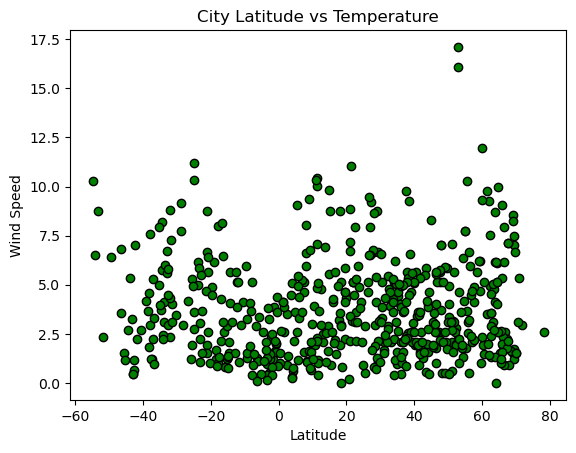

In [11]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df['Lat']
Wspeed = city_data_df['Wind Speed']
plt.scatter(lat, Wspeed, edgecolors='black', color= 'green')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs Temperature')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
x_axis = lat
y_axis = temp
pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress(x_axis, y_axis)
regress = x_axis * pe_slope + pe_int
line_eq = "y =" + str(round(pe_slope, 2)) + "x =" +str(round(pe_int,2))

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sisimiut,66.9395,-53.6735,-6.39,78,100,2.61,GL,1712801914
1,pakpattan,30.3410,73.3866,25.81,18,18,3.28,PK,1712801914
3,isafjordur,66.0755,-23.1240,-3.74,88,92,1.86,IS,1712801914
4,nova sintra,14.8667,-24.7167,22.57,77,11,9.83,CV,1712801914
7,massaguet,12.4755,15.4365,28.19,7,19,4.76,TD,1712801915


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,puerto natales,-51.7236,-72.4875,2.70,90,8,2.34,CL,1712801838
5,port mathurin,-19.6833,63.4167,26.72,78,31,4.87,MU,1712801915
6,alofi,-19.0595,-169.9187,29.94,70,75,6.17,NU,1712801722
9,san antonio de pale,-1.4014,5.6325,28.16,81,100,3.85,GQ,1712801915
15,edinburgh of the seven seas,-37.0676,-12.3116,17.86,80,100,2.25,SH,1712801916


###  Temperature vs. Latitude Linear Regression Plot

R squared: -0.8600556258583574


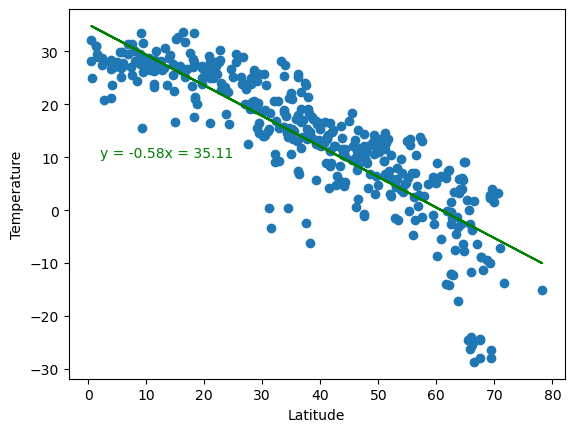

In [15]:
# Linear regression on Northern Hemisphere
northhemi_lat = northern_hemi_df['Lat']
northhemi_temp = northern_hemi_df['Max Temp']
pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress (northhemi_lat, northhemi_temp)
tl_regress = northhemi_lat * pe_slope + pe_int
line_eq = "y = " + str(round(pe_slope, 2)) + "x = " + str(round(pe_int, 2))

# Plot scatter chart
plt.scatter (northhemi_lat, northhemi_temp)

#plot regression line
plt.plot(northhemi_lat,tl_regress, c= "g")
plt.annotate(line_eq,(2,10), fontsize=10, color="green")

#label
plt.xlabel('Latitude')
plt.ylabel('Temperature')

# Print r squared 
print(f"R squared: {pe_r}")

R squared: 0.8138326913560936


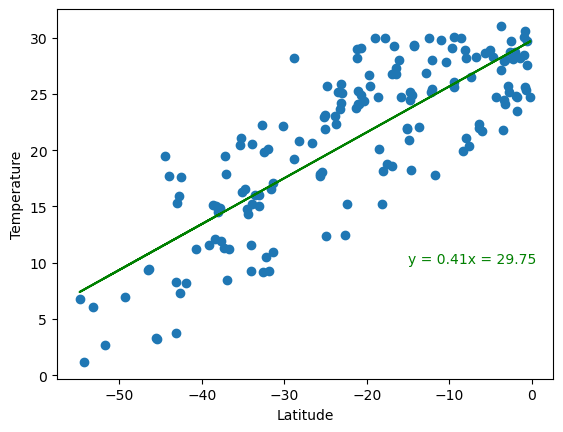

In [16]:
# Linear regression on Southern Hemisphere
# Linear regression on Northern Hemisphere
southhemi_lat = southern_hemi_df['Lat']
southhemi_temp = southern_hemi_df['Max Temp']
pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress (southhemi_lat, southhemi_temp)
tl_regress = southhemi_lat * pe_slope + pe_int
line_eq = "y = " + str(round(pe_slope, 2)) + "x = " + str(round(pe_int, 2))

# Plot scatter chart
plt.scatter (southhemi_lat, southhemi_temp)

#plot regression line
plt.plot(southhemi_lat,tl_regress, c= "g")
plt.annotate(line_eq,(-15,10), fontsize=10, color="green")

#label
plt.xlabel('Latitude')
plt.ylabel('Temperature')

# Print r squared 
print(f"R squared: {pe_r}")

**Discussion about the linear relationship:** Temperature apears to increase with latitudes around 0. The highest temperatures are those nearest the latitude of 0. The equator. 

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.3107034422926338


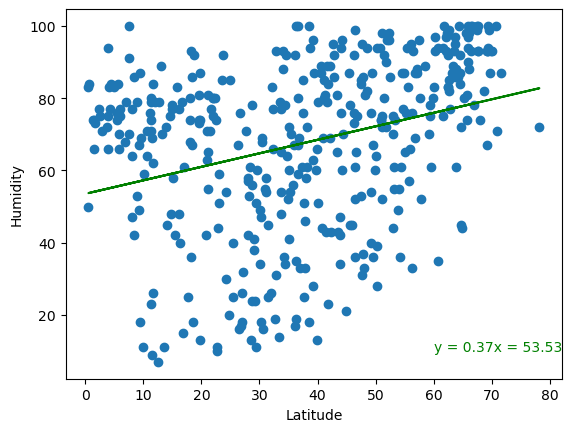

In [17]:
# Northern Hemisphere
northhemi_lat = northern_hemi_df['Lat']
northhemi_humid = northern_hemi_df['Humidity']
pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress (northhemi_lat, northhemi_humid)
tl_regress = northhemi_lat * pe_slope + pe_int
line_eq = "y = " + str(round(pe_slope, 2)) + "x = " + str(round(pe_int, 2))

# Plot scatter chart
plt.scatter (northhemi_lat, northhemi_humid)

#plot regression line
plt.plot(northhemi_lat,tl_regress, c= "g")
plt.annotate(line_eq,(60,10), fontsize=10, color="green")

#label
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r squared 
print(f"R squared: {pe_r}")

R squared: 0.2331638028886406


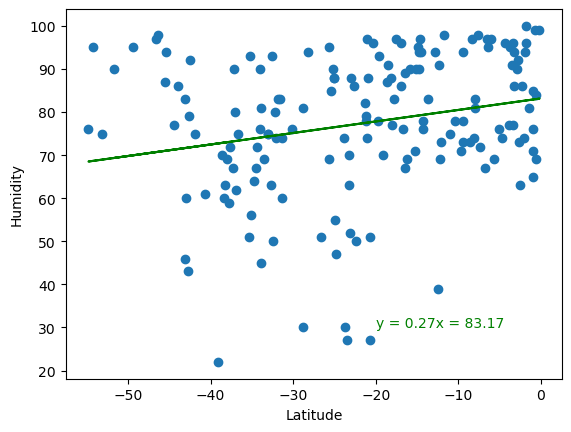

In [18]:
# Southern Hemisphere
southhemi_lat = southern_hemi_df['Lat']
southhemi_humid = southern_hemi_df['Humidity']
pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress (southhemi_lat, southhemi_humid)
tl_regress = southhemi_lat * pe_slope + pe_int
line_eq = "y = " + str(round(pe_slope, 2)) + "x = " + str(round(pe_int, 2))

# Plot scatter chart
plt.scatter (southhemi_lat, southhemi_humid)

#plot regression line
plt.plot(southhemi_lat,tl_regress, c= "g")
plt.annotate(line_eq,(-20,30), fontsize=10, color="green")

#label
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r squared 
print(f"R squared: {pe_r}")

**Discussion about the linear relationship:** Humidity increase slightly with latitude. There is less humidity in the negaitve numbers of latitude in the southern hemisphere. Overall though it is pretty spread out.

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.20770863292105152


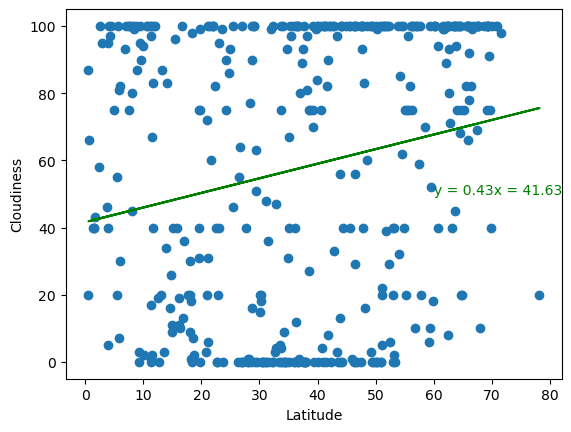

In [19]:
# Northern Hemisphere
northhemi_lat = northern_hemi_df['Lat']
northhemi_cloud = northern_hemi_df['Cloudiness']
pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress (northhemi_lat, northhemi_cloud)
tl_regress = northhemi_lat * pe_slope + pe_int
line_eq = "y = " + str(round(pe_slope, 2)) + "x = " + str(round(pe_int, 2))

# Plot scatter chart
plt.scatter (northhemi_lat, northhemi_cloud)

#plot regression line
plt.plot(northhemi_lat,tl_regress, c= "g")
plt.annotate(line_eq,(60,50), fontsize=10, color="green")

#label
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r squared 
print(f"R squared: {pe_r}")

R squared: 0.17211698003132106


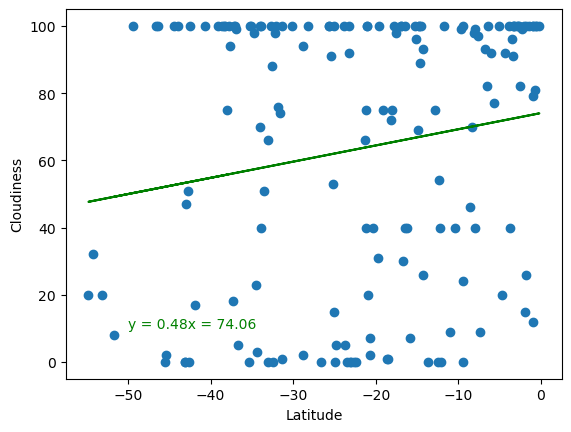

In [20]:
# Southern Hemisphere
southhemi_lat = southern_hemi_df['Lat']
southhemi_cloud = southern_hemi_df['Cloudiness']
pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress (southhemi_lat, southhemi_cloud)
tl_regress = southhemi_lat * pe_slope + pe_int
line_eq = "y = " + str(round(pe_slope, 2)) + "x = " + str(round(pe_int, 2))

# Plot scatter chart
plt.scatter (southhemi_lat, southhemi_cloud)

#plot regression line
plt.plot(southhemi_lat,tl_regress, c= "g")
plt.annotate(line_eq,(-50,10), fontsize=10, color="green")

#label
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r squared 
print(f"R squared: {pe_r}")

**Discussion about the linear relationship:** Cloudiness relationship with latitude overall is sparce. There is slightly more concentration of cloudier cities in the nothern hemishpere. 

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.04376700615635425


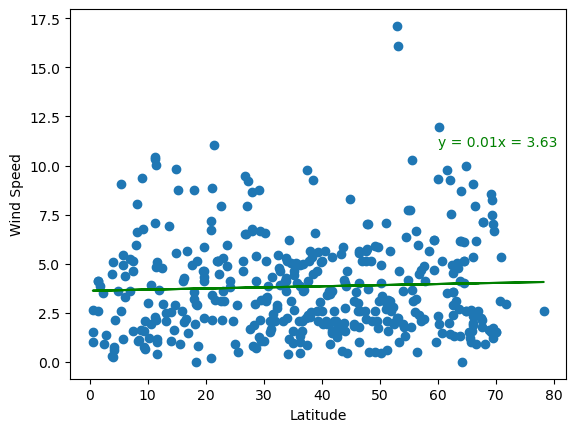

In [21]:
# Northern Hemisphere
northhemi_lat = northern_hemi_df['Lat']
northhemi_ws = northern_hemi_df['Wind Speed']
pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress (northhemi_lat, northhemi_ws)
tl_regress = northhemi_lat * pe_slope + pe_int
line_eq = "y = " + str(round(pe_slope, 2)) + "x = " + str(round(pe_int, 2))

# Plot scatter chart
plt.scatter (northhemi_lat, northhemi_ws)

#plot regression line
plt.plot(northhemi_lat,tl_regress, c= "g")
plt.annotate(line_eq,(60,11), fontsize=10, color="green")

#label
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r squared 
print(f"R squared: {pe_r}")

R squared: -0.3567601246872285


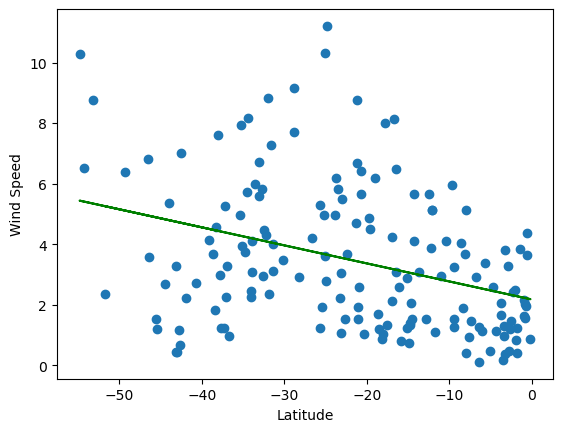

In [22]:
# Southern Hemisphere
southhemi_lat = southern_hemi_df['Lat']
southhemi_ws = southern_hemi_df['Wind Speed']
pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress (southhemi_lat, southhemi_ws)
tl_regress = southhemi_lat * pe_slope + pe_int
line_eq = "y = " + str(round(pe_slope, 2)) + "x = " + str(round(pe_int, 2))

# Plot scatter chart
plt.scatter (southhemi_lat, southhemi_ws)

#plot regression line
plt.plot(southhemi_lat,tl_regress, c= "g")
plt.annotate(line_eq,(-20, 13), fontsize=10, color="green")

#label
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r squared 
print(f"R squared: {pe_r}")

**Discussion about the linear relationship:** There is a higher concentration of cities with higher win spends in latitudes higher than -30